In [1]:
import pandas

cols = ['ip', 'ts', 'sent', 'recv', 'outoforder', 'lost', 'rtt_avg', 'rtt_sd']
df = pandas.read_csv('cor-test1.csv', header=None, names=cols)

#df.drop(df.index[:100], inplace=True)

In [2]:
df['time'] = pandas.to_datetime(df['ts'], unit='s')
#df

In [3]:
gb = df.groupby('ip')    
dfs = [(ip, gb.get_group(ip)) for ip in gb.groups]
dfs[0][1]

,ip,ts,sent,recv,outoforder,lost,rtt_avg,rtt_sd,time
0,::ffff:192.168.30.216,1612212291,1,0,0,0,0.000000,0.000000,2021-02-01 20:44:51
10,::ffff:192.168.30.216,1612212296,24,25,0,0,1.385981,0.403214,2021-02-01 20:44:56
20,::ffff:192.168.30.216,1612212301,25,25,0,0,1.373339,0.347302,2021-02-01 20:45:01
30,::ffff:192.168.30.216,1612212306,25,25,0,0,1.342783,0.281112,2021-02-01 20:45:06
40,::ffff:192.168.30.216,1612212311,25,25,0,0,1.282978,0.235704,2021-02-01 20:45:11
...,...,...,...,...,...,...,...,...,...
317360,::ffff:192.168.30.216,1612371013,25,25,0,0,1.146963,0.213479,2021-02-03 16:50:13
317370,::ffff:192.168.30.216,1612371018,24,24,0,0,1.082848,0.243674,2021-02-03 16:50:18
317380,::ffff:192.168.30.216,1612371023,25,25,0,0,1.075361,0.243898,2021-02-03 16:50:23
317390,::ffff:192.168.30.216,1612371028,25,25,0,0,0.979108,0.310421,2021-02-03 16:50:28


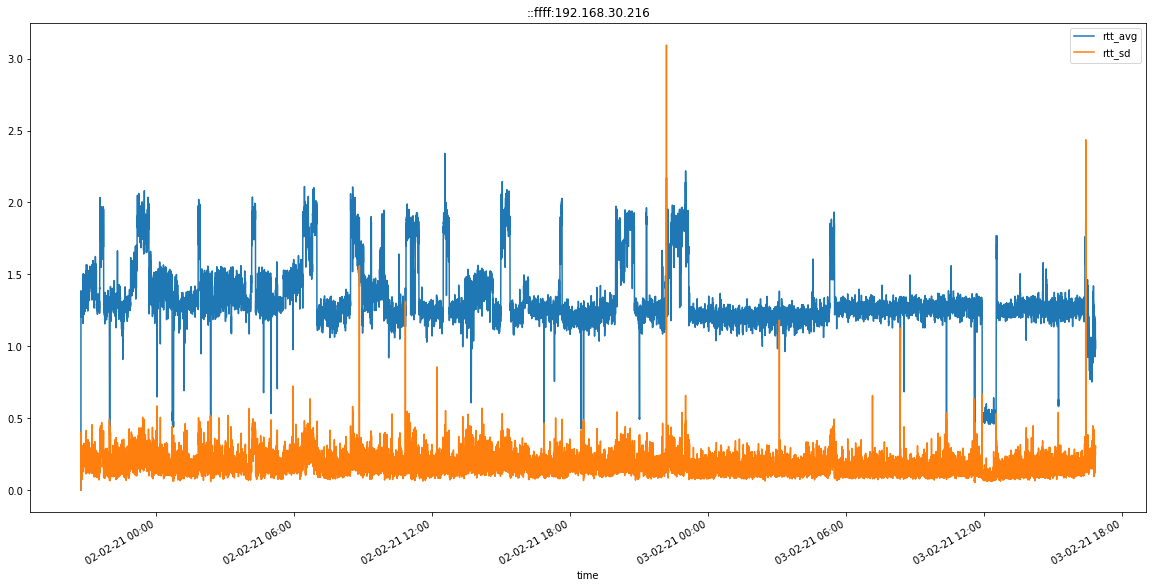

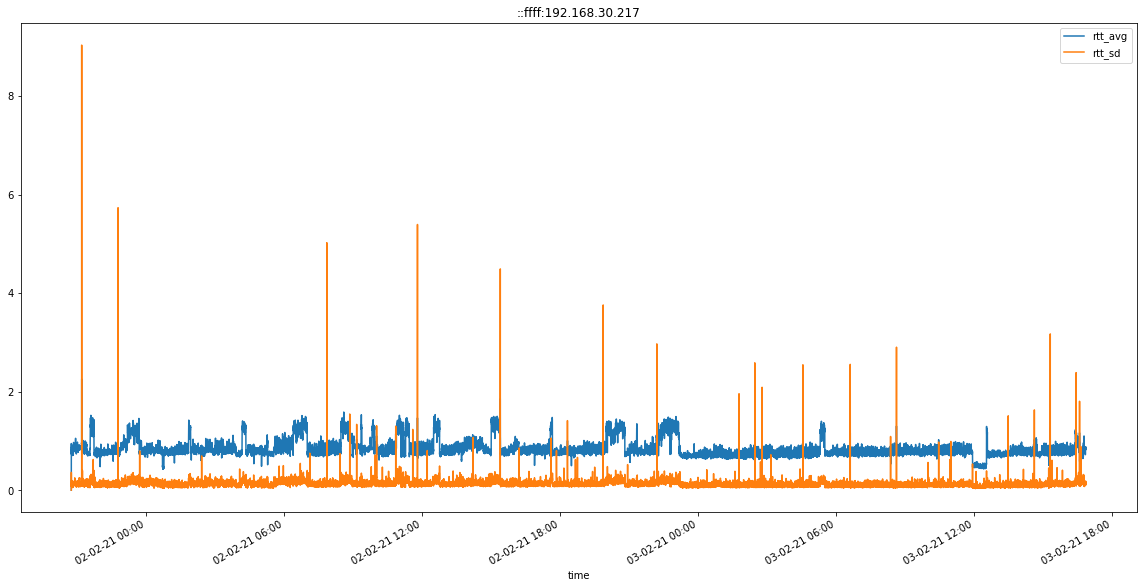

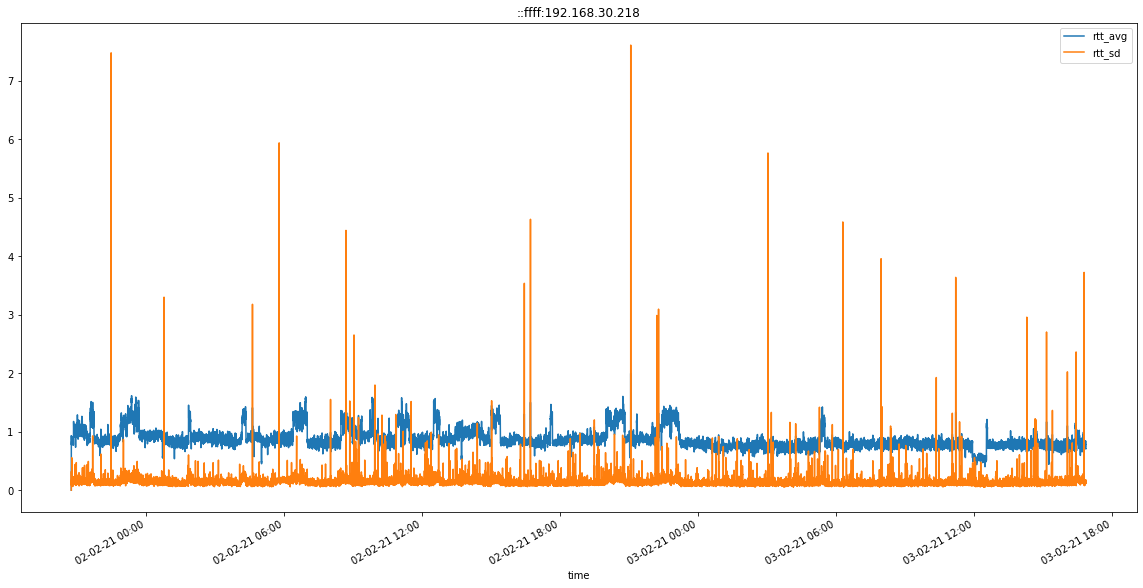

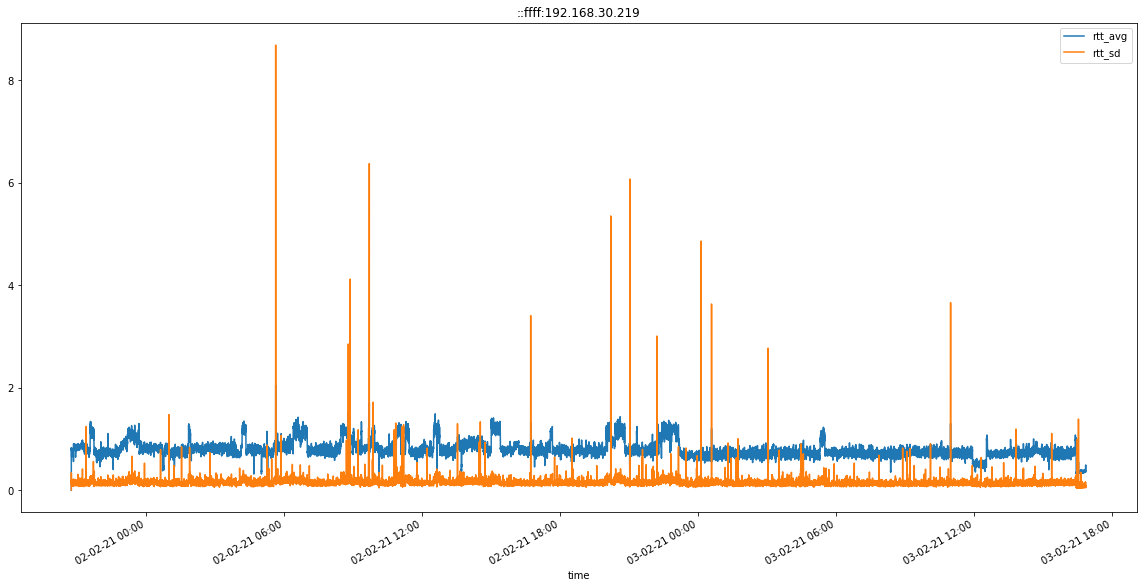

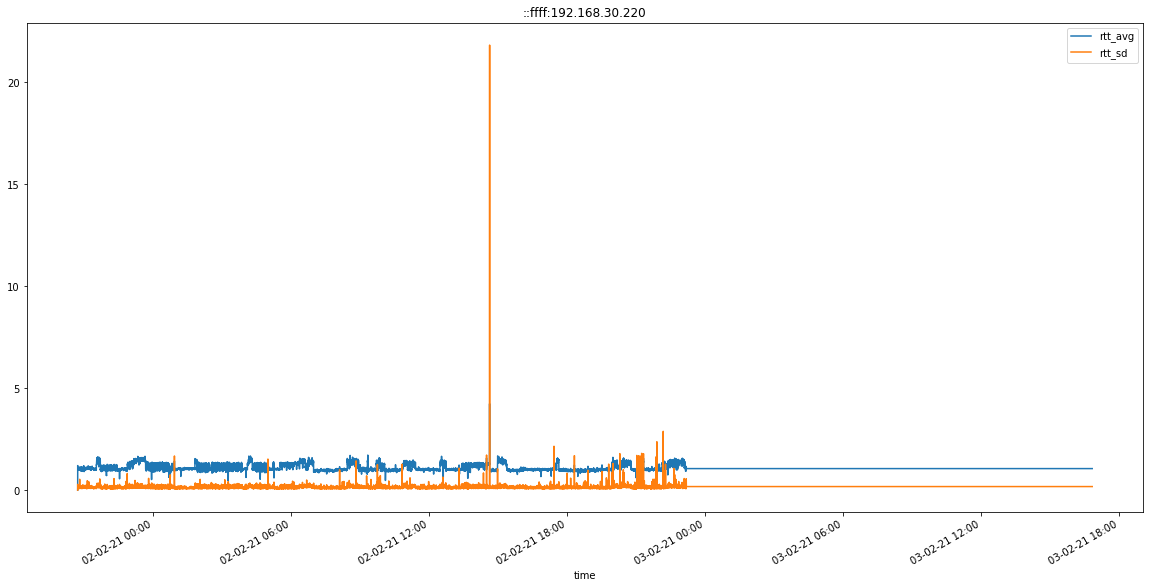

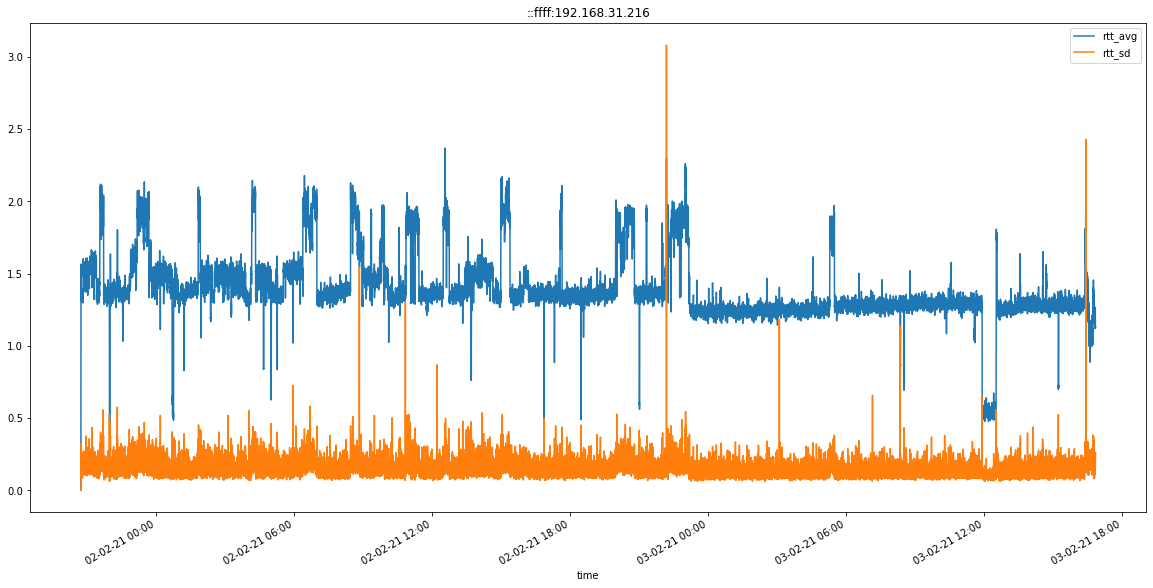

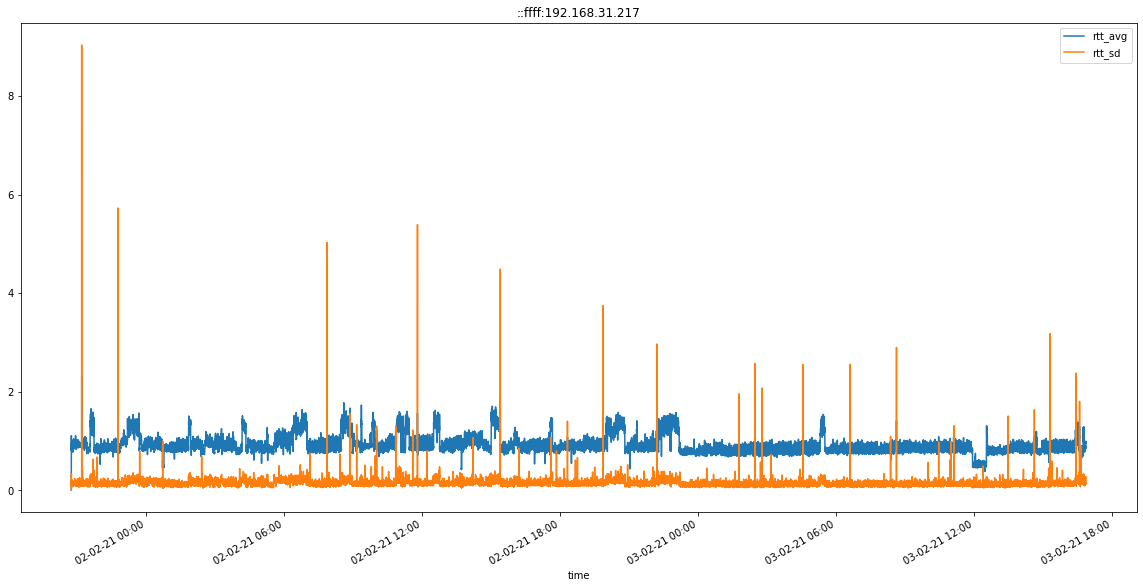

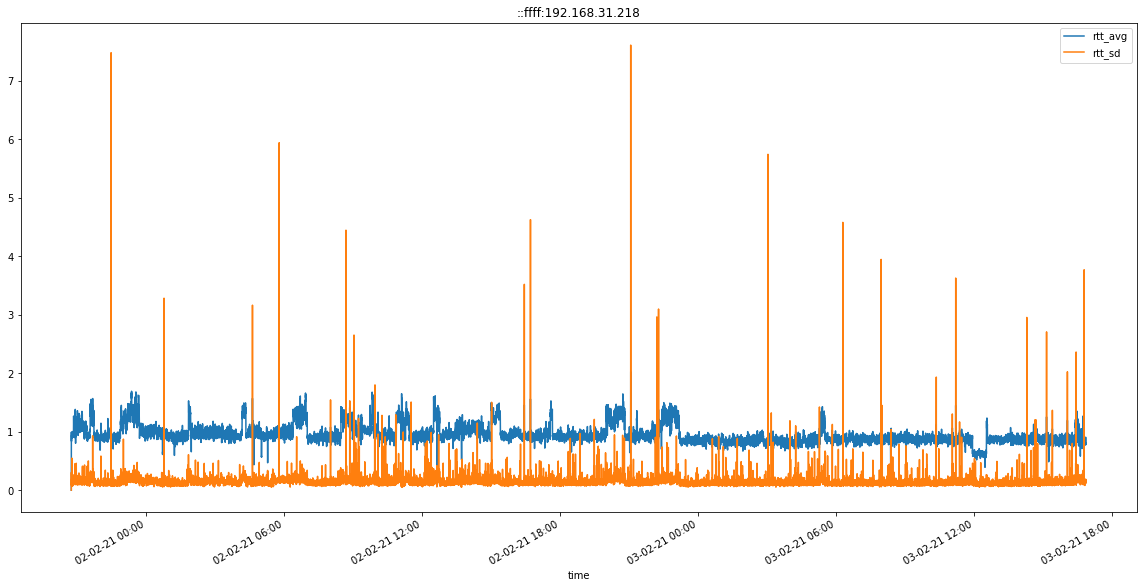

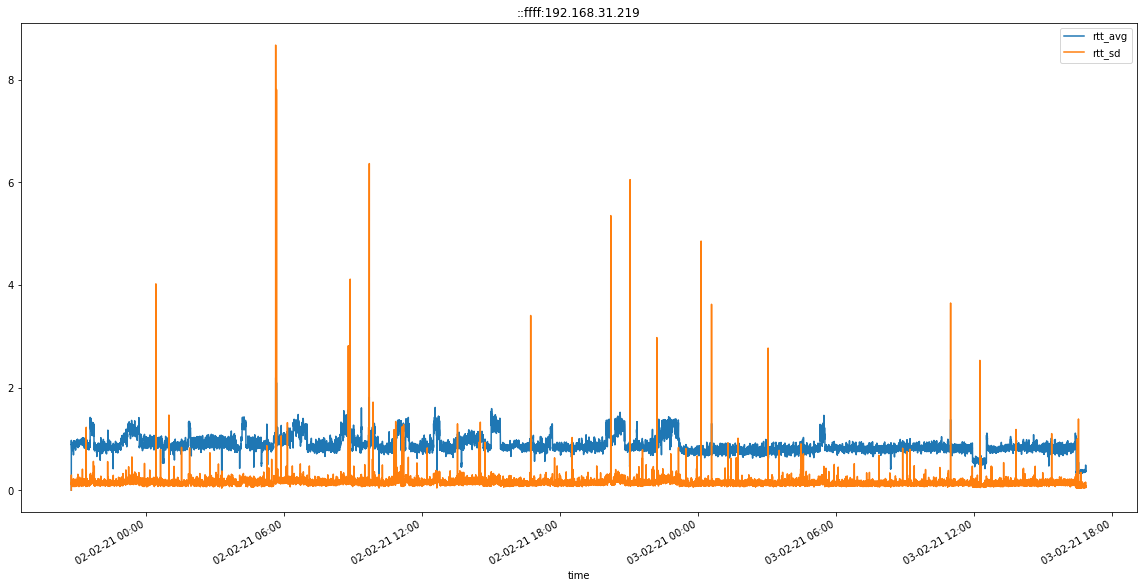

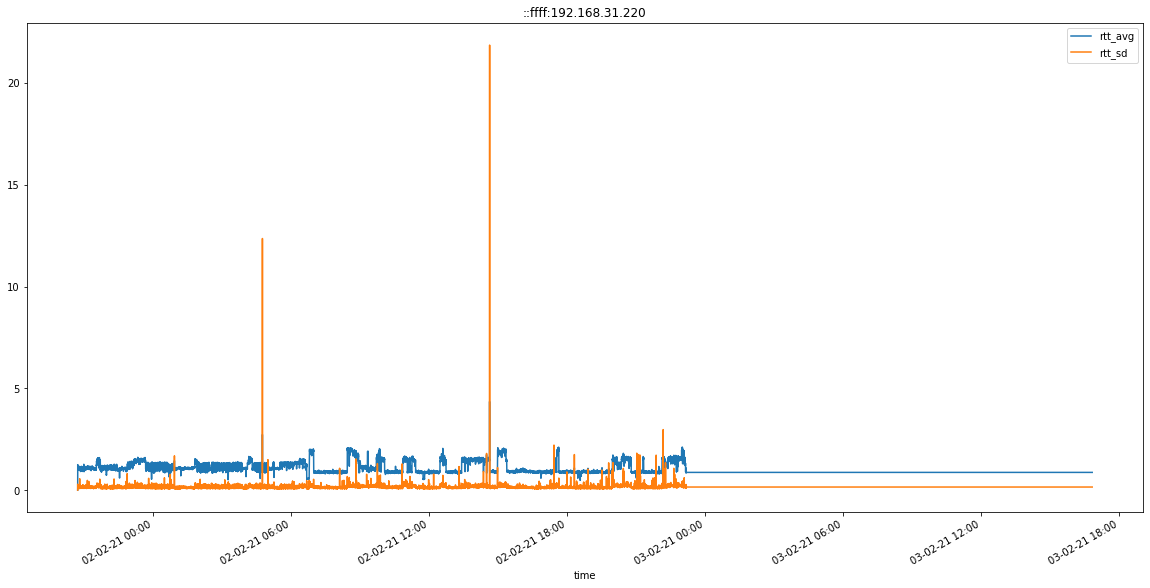

In [4]:
import matplotlib.dates as mdates
dfmt = mdates.DateFormatter('%d-%m-%y %H:%M')

for ip, sdf in dfs:
    ax = sdf.plot(x='time', y=['rtt_avg', 'rtt_sd'], figsize=(20,10), title=ip)
    ax.xaxis.set_major_formatter(dfmt)
    #ax.twinx()

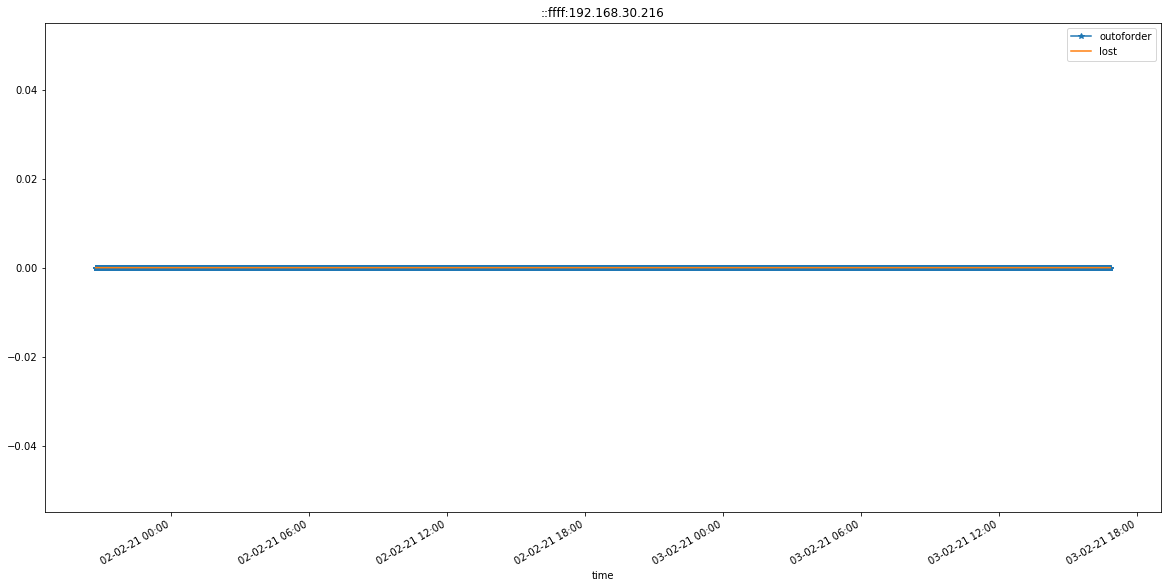

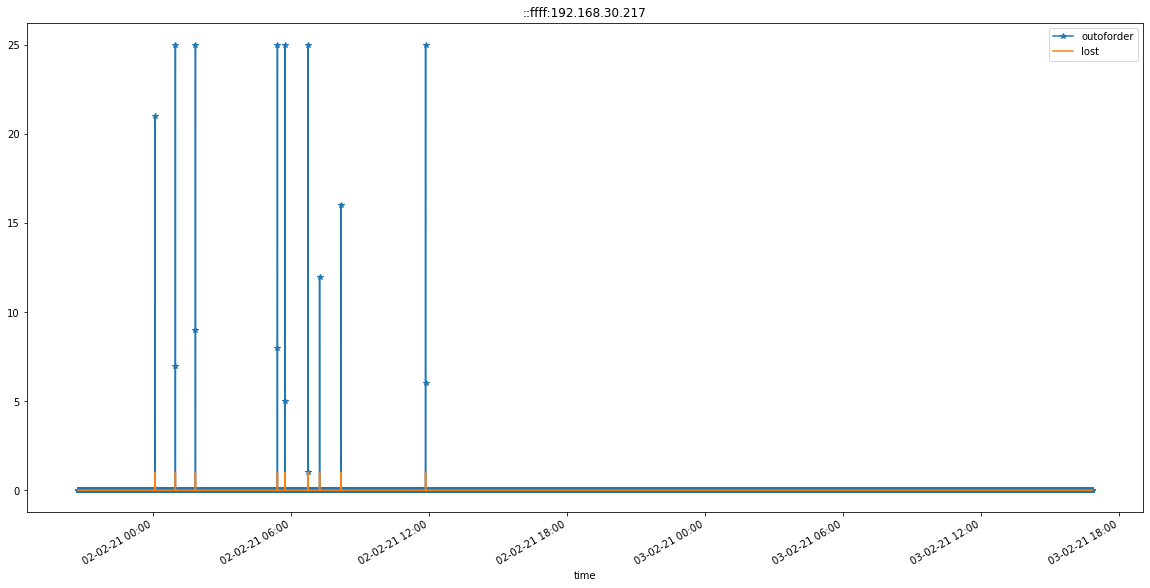

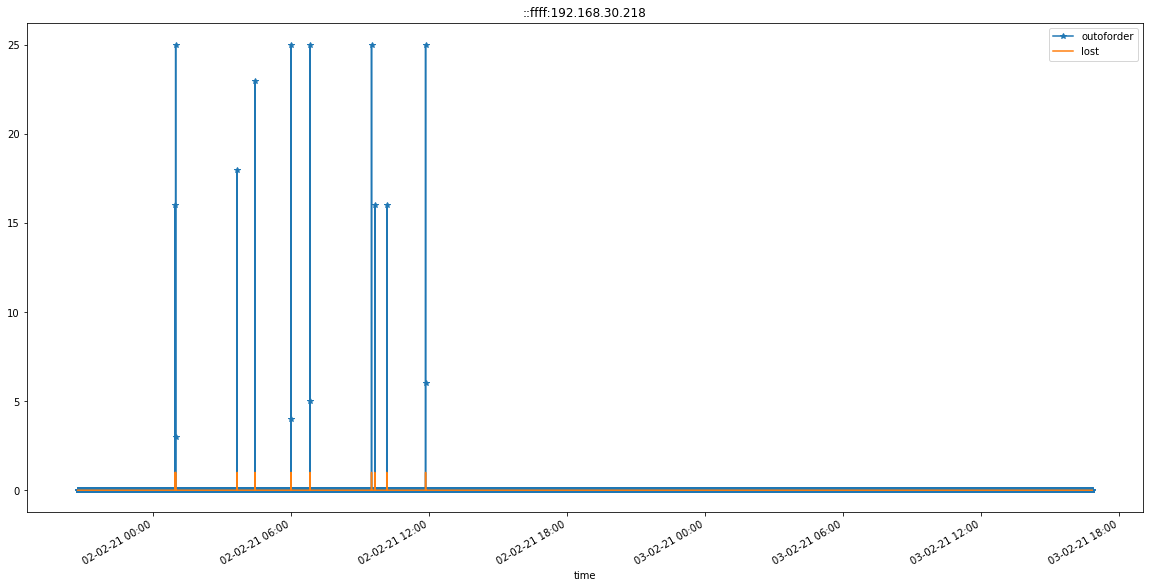

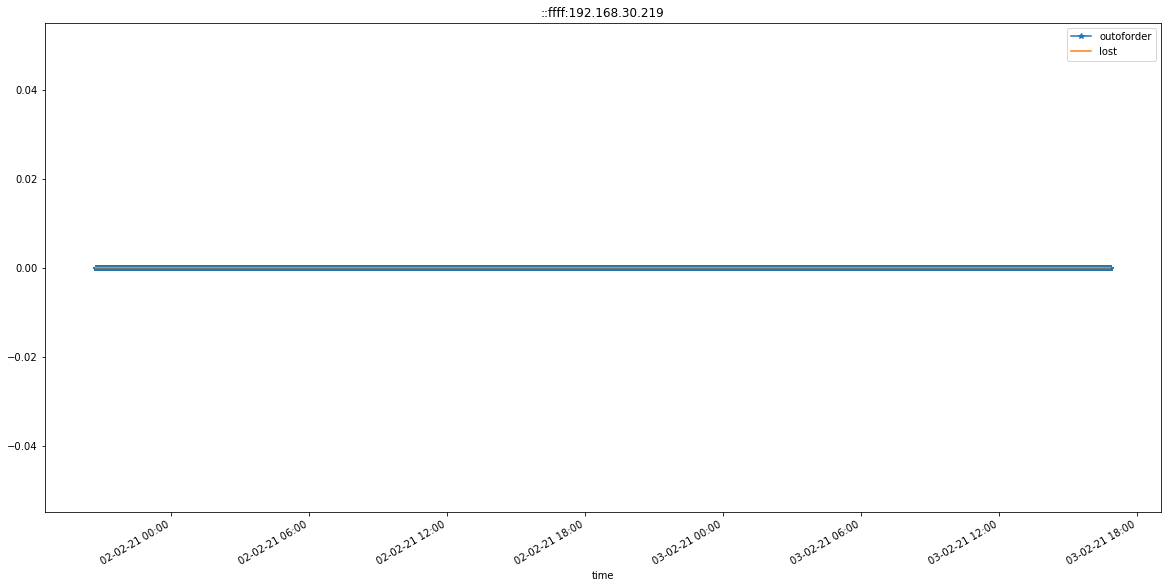

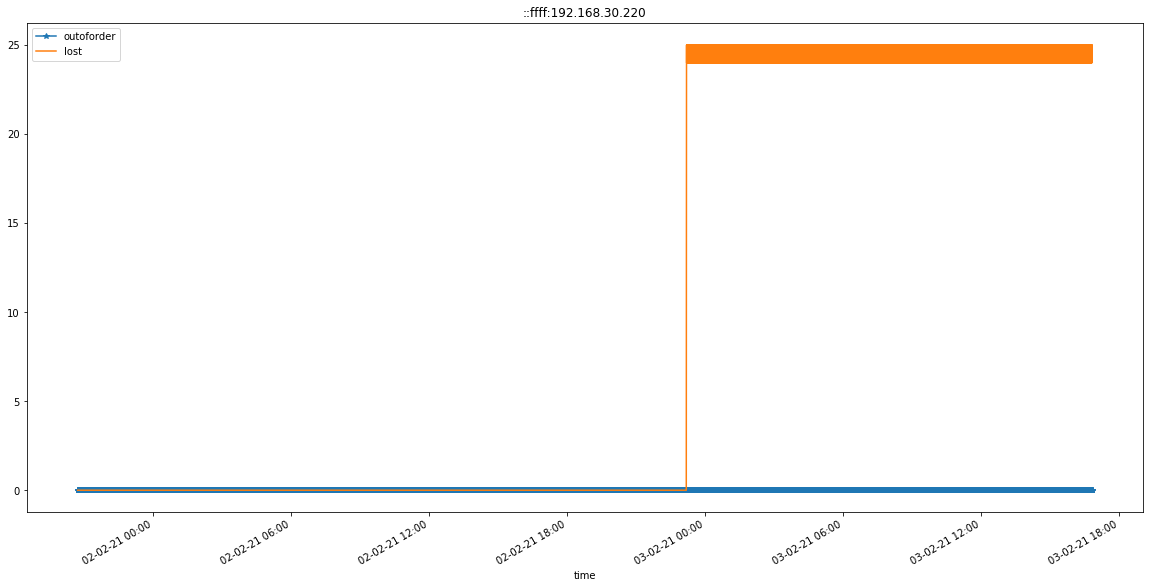

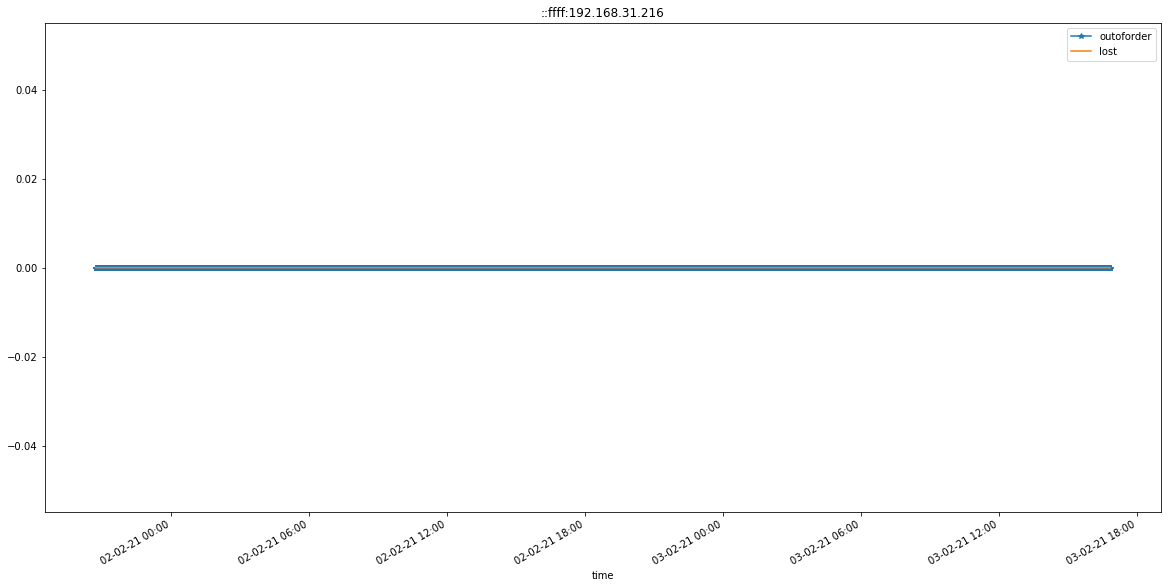

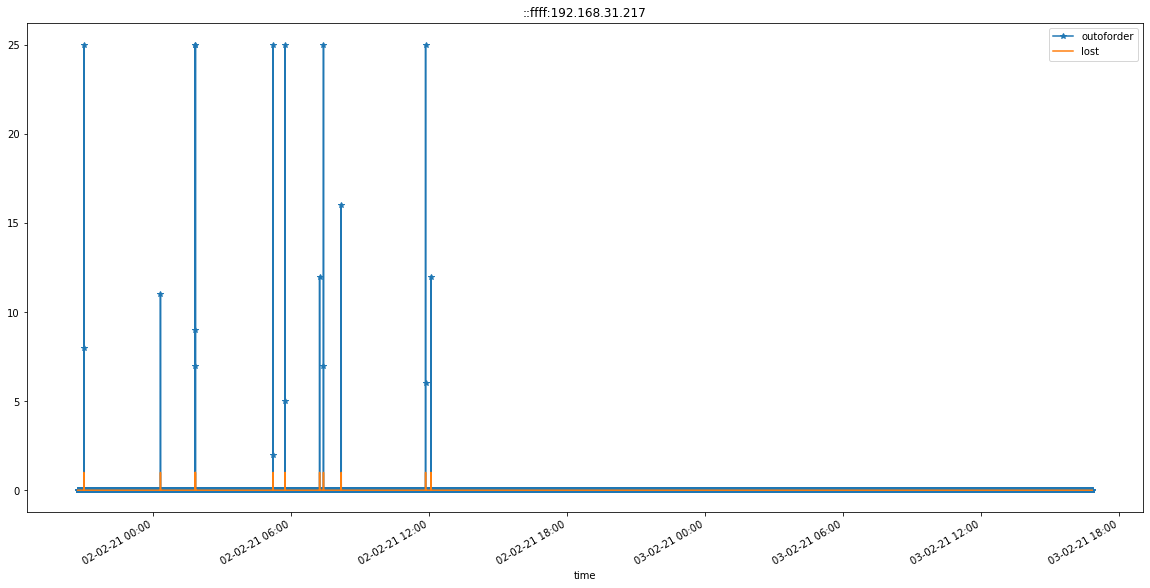

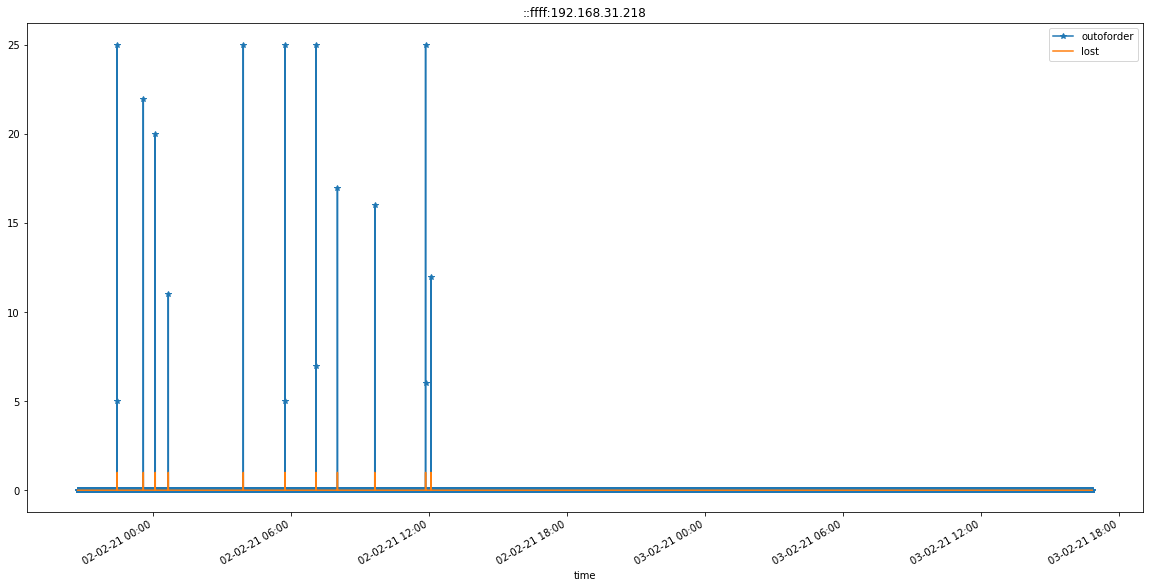

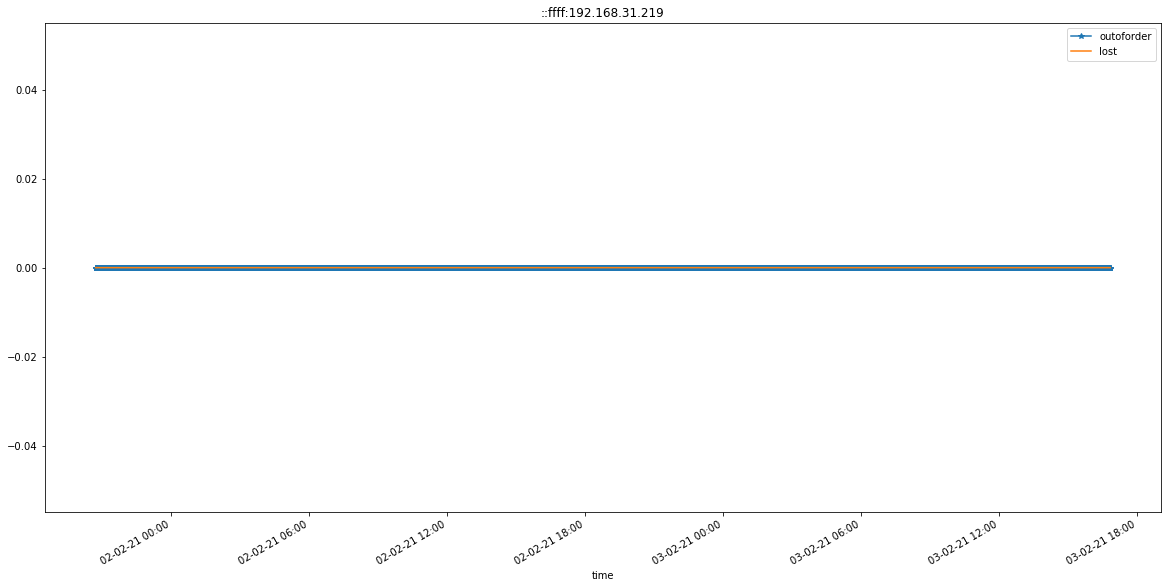

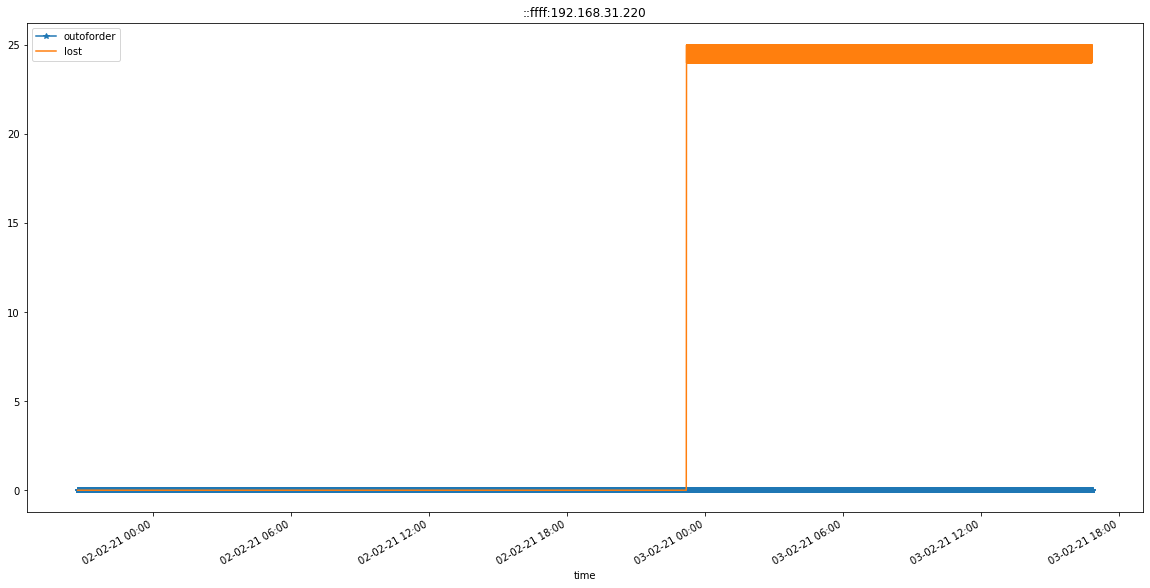

In [5]:
for ip, sdf in dfs:
    #ax = sdf.plot(x='time', y=['recv', 'lost', 'outoforder'], figsize=(20,10), title=ip)
    ax = sdf.plot(x='time', y=['outoforder', 'lost'], figsize=(20,10), title=ip, style=['*-', '-'])
    ax.xaxis.set_major_formatter(dfmt)

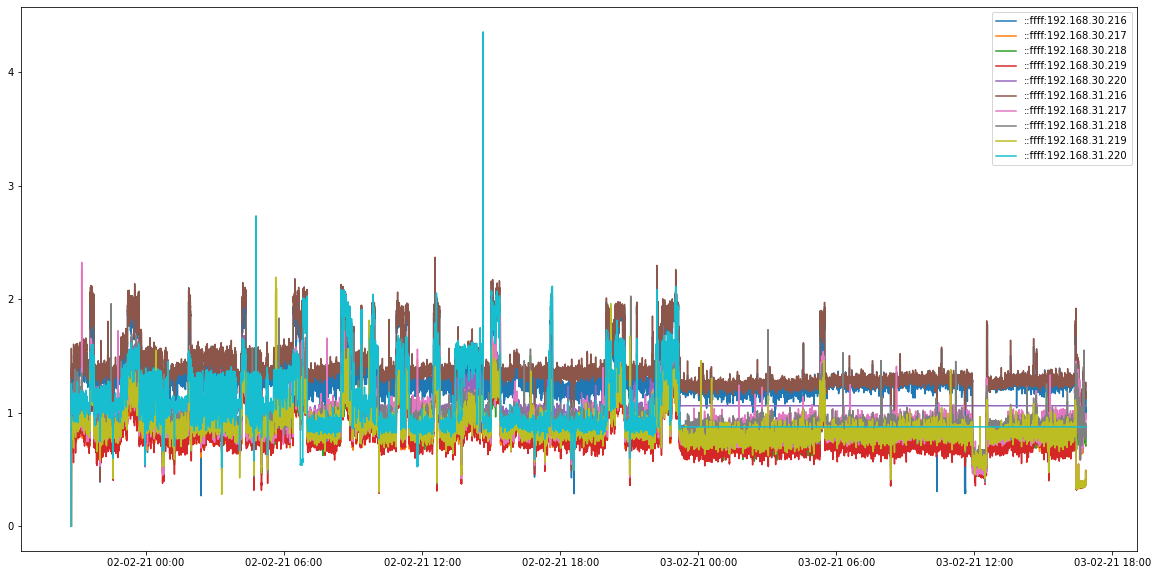

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
for key, grp in df.groupby(['ip']):
    ax.plot(grp['time'], grp['rtt_avg'], label=key)
ax.xaxis.set_major_formatter(dfmt)
ax.legend()
plt.show()

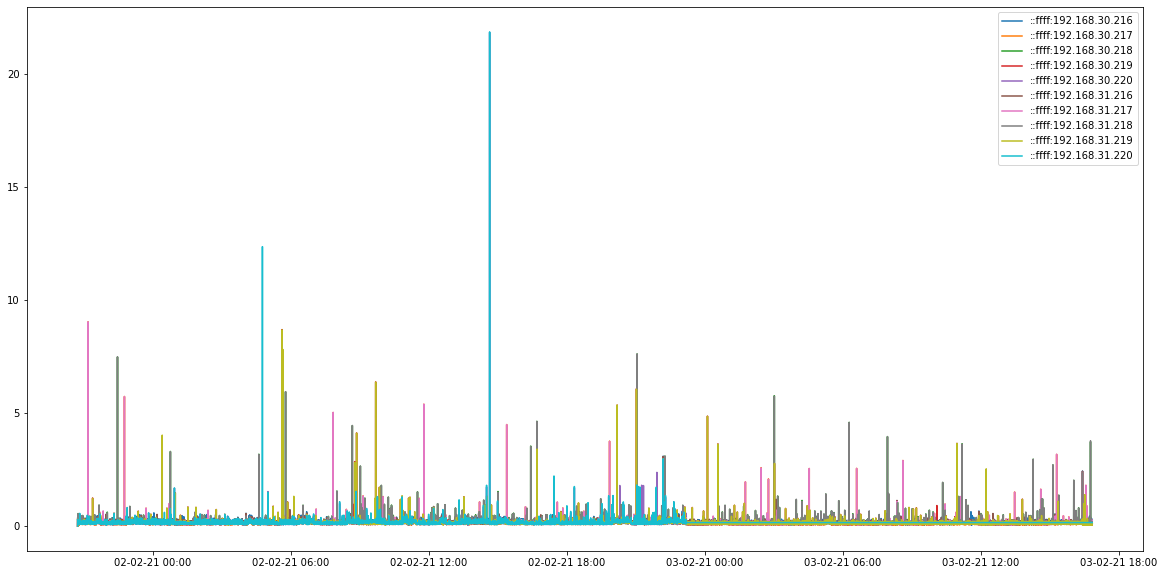

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
for key, grp in df.groupby(['ip']):
    ax.plot(grp['time'], grp['rtt_sd'], label=key)
ax.xaxis.set_major_formatter(dfmt)
ax.legend()
plt.show()

array([[<AxesSubplot:title={'center':'::ffff:192.168.30.216'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.30.217'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.30.218'}>],
       [<AxesSubplot:title={'center':'::ffff:192.168.30.219'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.30.220'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.31.216'}>],
       [<AxesSubplot:title={'center':'::ffff:192.168.31.217'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.31.218'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.31.219'}>],
       [<AxesSubplot:title={'center':'::ffff:192.168.31.220'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

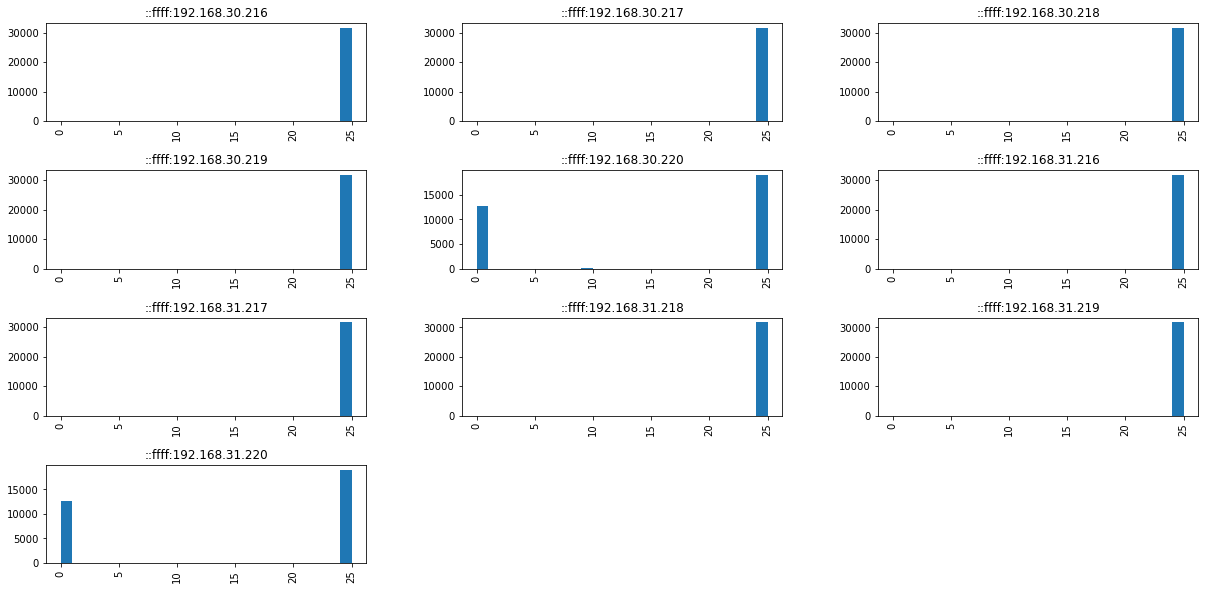

In [8]:
df.hist('recv', by='ip', figsize=(20,10), bins=25)

array([[<AxesSubplot:title={'center':'::ffff:192.168.30.216'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.30.217'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.30.218'}>],
       [<AxesSubplot:title={'center':'::ffff:192.168.30.219'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.30.220'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.31.216'}>],
       [<AxesSubplot:title={'center':'::ffff:192.168.31.217'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.31.218'}>,
        <AxesSubplot:title={'center':'::ffff:192.168.31.219'}>],
       [<AxesSubplot:title={'center':'::ffff:192.168.31.220'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

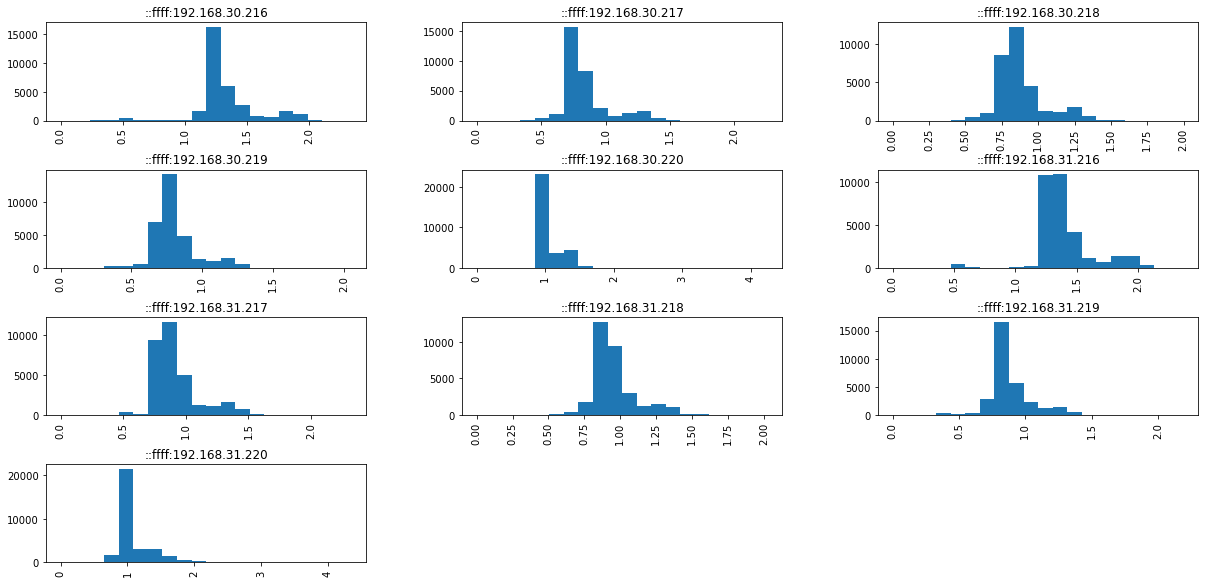

In [9]:
df.hist('rtt_avg', by='ip', figsize=(20,10), bins=20)